# PvP playout analysis

In [ ]:
import sys
import os

project_root = os.path.abspath("../..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats = ['svg']


## Measure win rates

In [3]:
from catan.core.game import Game
from catan.core.models.map import DEFAULT_MAP
from catan.core.models.player import Color, RandomPlayer


def playout(players):
    game = Game(players=players, catan_map=DEFAULT_MAP)
    game.play()

    return game.state.num_turns


def n_playout_steps(players, n_playouts):
    return [playout(players) for _ in range(n_playouts)]


n_games = 500
steps_by_player = [
    n_playout_steps(
        [
            RandomPlayer(color=Color.BLUE),
        ],
        n_games,
    ),
    n_playout_steps(
        [RandomPlayer(color=Color.BLUE), RandomPlayer(color=Color.RED)], n_games
    ),
    n_playout_steps(
        [
            RandomPlayer(color=Color.BLUE),
            RandomPlayer(color=Color.RED),
            RandomPlayer(color=Color.ORANGE),
        ],
        n_games,
    ),
    n_playout_steps(
        [
            RandomPlayer(color=Color.BLUE),
            RandomPlayer(color=Color.WHITE),
            RandomPlayer(color=Color.RED),
            RandomPlayer(color=Color.ORANGE),
        ],
        n_games,
    ),
]


KeyboardInterrupt: 

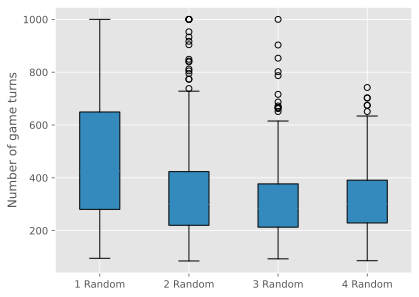

In [55]:
from matplotlib import pyplot as plt

plt.style.use("ggplot")


labels = ["1 Random", "2 Random", "3 Random", "4 Random"]

fig, ax = plt.subplots()
ax.set_ylabel("Number of game turns")

bplot = ax.boxplot(steps_by_player, tick_labels=labels, patch_artist=True)
ax.grid(visible=True)


plt.show()

## MCTS bots

In [61]:
from catan.bots.mcts_bot import MCTSBot

roots = []


def debug_cb(root):
    roots.append(root)


game = Game(
    catan_map=DEFAULT_MAP,
    players=[
        RandomPlayer(color=Color.RED, is_bot=True),
        MCTSBot(
            color=Color.BLUE,
            n_simulations=50,
            # debug=True,
            debug_cb=debug_cb,
        ),
    ],
)
game.play()

<Color.BLUE: 'BLUE'>

In [63]:
from catan.analysis.player_stats import player_stats, print_player_stats

print_player_stats(player_stats(game))

[PlayerStats(color=<Color.RED: 'RED'>,
             player_type='RandomPlayer',
             victory_points=2,
             longest_road=3,
             settlements=[12, 34],
             n_settlements=2,
             roads=[(12, 13), (34, 35), (11, 12), (35, 36), (33, 34), (11, 32)],
             n_roads=6,
             cities=[],
             n_cities=0),
 PlayerStats(color=<Color.BLUE: 'BLUE'>,
             player_type='MCTSBot',
             victory_points=10,
             longest_road=8,
             settlements=[43, 40],
             n_settlements=2,
             roads=[(16, 18), (3, 4), (18, 40), (17, 18), (3, 12), (40, 44),
                    (43, 44), (43, 47), (21, 43), (19, 21), (45, 47), (16, 21),
                    (5, 16)],
             n_roads=13,
             cities=[4, 16],
             n_cities=2)]


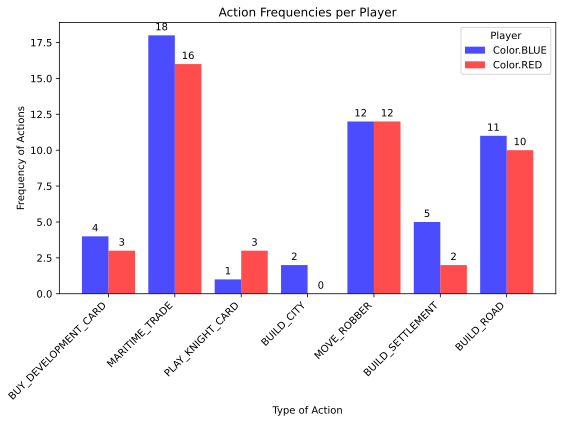

In [184]:
from catan.analysis.plot_utils import plot_action_freqs
from catan.core.models.enums import ActionType


_, _ = plot_action_freqs(
    game.state.actions, exclusions=[ActionType.ROLL.name, ActionType.END_TURN.name]
)

In [86]:
from matplotlib import pyplot as plt
import numpy as np

mcts_color: Color = Color.BLUE
sim_range = np.arange(10, 100, 10)
games_per_sim = 10
n_playouts = len(sim_range)
mcts_win_rates = np.zeros(n_playouts)

for node_id, n_sim in enumerate(sim_range):
    mcts_playout_wins = 0
    for n_game_in_sim in range(1, games_per_sim + 1):
        print(f"MCTS Sims {n_sim} | Playing {n_game_in_sim}/{games_per_sim} game")
        game = Game(
            catan_map=DEFAULT_MAP,
            players=[
                RandomPlayer(color=Color.RED, is_bot=True),
                MCTSBot(color=Color.BLUE, n_simulations=n_sim),
            ],
        )
        winner_color = game.play()

        if winner_color == mcts_color:
            mcts_playout_wins += 1

    mcts_win_rates[node_id] = mcts_playout_wins / games_per_sim

MCTS Sims 10 | Playing 1/10 game
MCTS Sims 10 | Playing 2/10 game
MCTS Sims 10 | Playing 3/10 game
MCTS Sims 10 | Playing 4/10 game
MCTS Sims 10 | Playing 5/10 game
MCTS Sims 10 | Playing 6/10 game
MCTS Sims 10 | Playing 7/10 game
MCTS Sims 10 | Playing 8/10 game
MCTS Sims 10 | Playing 9/10 game
MCTS Sims 10 | Playing 10/10 game
MCTS Sims 20 | Playing 1/10 game
MCTS Sims 20 | Playing 2/10 game
MCTS Sims 20 | Playing 3/10 game
MCTS Sims 20 | Playing 4/10 game
MCTS Sims 20 | Playing 5/10 game
MCTS Sims 20 | Playing 6/10 game
MCTS Sims 20 | Playing 7/10 game
MCTS Sims 20 | Playing 8/10 game
MCTS Sims 20 | Playing 9/10 game
MCTS Sims 20 | Playing 10/10 game
MCTS Sims 30 | Playing 1/10 game
MCTS Sims 30 | Playing 2/10 game
MCTS Sims 30 | Playing 3/10 game
MCTS Sims 30 | Playing 4/10 game
MCTS Sims 30 | Playing 5/10 game
MCTS Sims 30 | Playing 6/10 game
MCTS Sims 30 | Playing 7/10 game
MCTS Sims 30 | Playing 8/10 game
MCTS Sims 30 | Playing 9/10 game
MCTS Sims 30 | Playing 10/10 game
MCTS Si

In [139]:
from catan.core.models.player import Color

mcts_color: Color = Color.BLUE
sim_range2 = np.arange(1, 10, 1)
games_per_sim = 10
n_playouts = len(sim_range2)
mcts_win_rates2 = np.zeros(n_playouts)

for node_id, n_sim in enumerate(sim_range2):
    mcts_playout_wins = 0
    for n_game_in_sim in range(1, games_per_sim + 1):
        print(f"MCTS Sims {n_sim} | Playing {n_game_in_sim}/{games_per_sim} game")
        game = Game(
            catan_map=DEFAULT_MAP,
            players=[
                RandomPlayer(color=Color.RED, is_bot=True),
                MCTSBot(color=mcts_color, n_simulations=n_sim),
            ],
        )
        winner_color = game.play()

        if winner_color == mcts_color:
            mcts_playout_wins += 1

    mcts_win_rates2[node_id] = mcts_playout_wins / games_per_sim

MCTS Sims 1 | Playing 1/10 game
MCTS Sims 1 | Playing 2/10 game
MCTS Sims 1 | Playing 3/10 game
MCTS Sims 1 | Playing 4/10 game
MCTS Sims 1 | Playing 5/10 game
MCTS Sims 1 | Playing 6/10 game
MCTS Sims 1 | Playing 7/10 game
MCTS Sims 1 | Playing 8/10 game
MCTS Sims 1 | Playing 9/10 game
MCTS Sims 1 | Playing 10/10 game
MCTS Sims 2 | Playing 1/10 game
MCTS Sims 2 | Playing 2/10 game
MCTS Sims 2 | Playing 3/10 game
MCTS Sims 2 | Playing 4/10 game
MCTS Sims 2 | Playing 5/10 game
MCTS Sims 2 | Playing 6/10 game
MCTS Sims 2 | Playing 7/10 game
MCTS Sims 2 | Playing 8/10 game
MCTS Sims 2 | Playing 9/10 game
MCTS Sims 2 | Playing 10/10 game
MCTS Sims 3 | Playing 1/10 game
MCTS Sims 3 | Playing 2/10 game
MCTS Sims 3 | Playing 3/10 game
MCTS Sims 3 | Playing 4/10 game
MCTS Sims 3 | Playing 5/10 game
MCTS Sims 3 | Playing 6/10 game
MCTS Sims 3 | Playing 7/10 game
MCTS Sims 3 | Playing 8/10 game
MCTS Sims 3 | Playing 9/10 game
MCTS Sims 3 | Playing 10/10 game
MCTS Sims 4 | Playing 1/10 game
MCTS 

Text(0.02, 0.5, 'MCTS win rate')

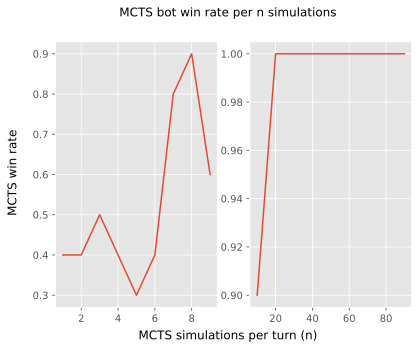

In [174]:
fig, axs = plt.subplots(ncols=2)

fig.suptitle("MCTS bot win rate per n simulations")

axs[1].plot(sim_range, mcts_win_rates)

axs[0].plot(sim_range2, mcts_win_rates2)

fig.supxlabel("MCTS simulations per turn (n)")
fig.supylabel("MCTS win rate")

In [60]:
from catan.analysis.player_stats import player_stats, print_player_stats


stats = player_stats(game)
print_player_stats(stats)

[PlayerStats(color=<Color.BLUE: 'BLUE'>,
             player_type='MCTSBot',
             victory_points=10,
             longest_road=6,
             settlements=[14, 20, 4, 36, 23],
             n_settlements=5,
             roads=[(14, 15), (20, 22), (14, 37), (36, 37), (4, 15), (4, 5),
                    (0, 5), (5, 16), (22, 23), (6, 23)],
             n_roads=10,
             cities=[],
             n_cities=0),
 PlayerStats(color=<Color.RED: 'RED'>,
             player_type='RandomPlayer',
             victory_points=3,
             longest_road=2,
             settlements=[42, 16],
             n_settlements=2,
             roads=[(40, 42), (16, 18), (41, 42), (16, 21)],
             n_roads=4,
             cities=[],
             n_cities=0)]


### MCTS Debug

### MCTS optimization

Our current MCTS scheme performance suffers, this is primarily by high branching factor -- actions possible with every step. According to thew previous analysis the average.

#### Potential moves that can be reduced

1. Initial settlement and road building, since there are 54 possible placement, we can limit only to the most promising ones.
2. Thief placement, instead of all possible tiles, place thief only on the most harmful fields for the opponents.
3. Die rolls and turn ends could be fast forwarded, no need to simulate the whole game.
4. 

In [125]:
from catan.core.models.map import DEFAULT_MAP


len(DEFAULT_MAP.land_tiles)

19

In [122]:
g1 = Game(catan_map=DEFAULT_MAP, players=[RandomPlayer(color=Color.RED)])
g2 = Game(catan_map=DEFAULT_MAP, players=[RandomPlayer(color=Color.RED)])

In [123]:
DEFAULT_MAP.tiles

{(0,
  0,
  0): LandTile(id=0, resource=None, number=None, nodes={<NodeRef.NORTH: 'NORTH'>: 0, <NodeRef.NORTHEAST: 'NORTHEAST'>: 1, <NodeRef.SOUTHEAST: 'SOUTHEAST'>: 2, <NodeRef.SOUTH: 'SOUTH'>: 3, <NodeRef.SOUTHWEST: 'SOUTHWEST'>: 4, <NodeRef.NORTHWEST: 'NORTHWEST'>: 5}, edges={<EdgeRef.EAST: 'EAST'>: (1, 2), <EdgeRef.SOUTHEAST: 'SOUTHEAST'>: (2, 3), <EdgeRef.SOUTHWEST: 'SOUTHWEST'>: (3, 4), <EdgeRef.WEST: 'WEST'>: (4, 5), <EdgeRef.NORTHWEST: 'NORTHWEST'>: (5, 0), <EdgeRef.NORTHEAST: 'NORTHEAST'>: (0, 1)}),
 (1,
  -1,
  0): LandTile(id=1, resource='ORE', number=6, nodes={<NodeRef.NORTH: 'NORTH'>: 6, <NodeRef.NORTHEAST: 'NORTHEAST'>: 7, <NodeRef.SOUTHEAST: 'SOUTHEAST'>: 8, <NodeRef.SOUTH: 'SOUTH'>: 9, <NodeRef.SOUTHWEST: 'SOUTHWEST'>: 2, <NodeRef.NORTHWEST: 'NORTHWEST'>: 1}, edges={<EdgeRef.EAST: 'EAST'>: (7, 8), <EdgeRef.SOUTHEAST: 'SOUTHEAST'>: (8, 9), <EdgeRef.SOUTHWEST: 'SOUTHWEST'>: (9, 2), <EdgeRef.WEST: 'WEST'>: (1, 2), <EdgeRef.NORTHWEST: 'NORTHWEST'>: (1, 6), <EdgeRef.NORTHEAS

In [185]:
from catan.bots.mcts_bot import MCTSBot

roots = []


def debug_cb(root):
    roots.append(root)


game = Game(
    catan_map=DEFAULT_MAP,
    players=[
        RandomPlayer(color=Color.RED, is_bot=True),
        MCTSBot(color=Color.BLUE, n_simulations=30, debug=True, debug_cb=debug_cb),
    ],
)
game.play()

Move 1: MCTS bot performed action Action(color=<Color.BLUE: 'BLUE'>, action_type=<ActionType.BUILD_SETTLEMENT: 'BUILD_SETTLEMENT'>, value=7)
Move 1: MCTS bot performed action Action(color=<Color.BLUE: 'BLUE'>, action_type=<ActionType.BUILD_ROAD: 'BUILD_ROAD'>, value=(7, 8))
Move 1: MCTS bot performed action Action(color=<Color.BLUE: 'BLUE'>, action_type=<ActionType.BUILD_SETTLEMENT: 'BUILD_SETTLEMENT'>, value=13)
Move 1: MCTS bot performed action Action(color=<Color.BLUE: 'BLUE'>, action_type=<ActionType.BUILD_ROAD: 'BUILD_ROAD'>, value=(13, 34))
Move 5: MCTS bot performed action Action(color=<Color.BLUE: 'BLUE'>, action_type=<ActionType.MOVE_ROBBER: 'MOVE_ROBBER'>, value=((2, -1, -1), None, None))
Move 13: MCTS bot performed action Action(color=<Color.BLUE: 'BLUE'>, action_type=<ActionType.MOVE_ROBBER: 'MOVE_ROBBER'>, value=((2, -1, -1), None, None))
Move 15: MCTS bot performed action Action(color=<Color.BLUE: 'BLUE'>, action_type=<ActionType.MOVE_ROBBER: 'MOVE_ROBBER'>, value=((2, 0,

<Color.BLUE: 'BLUE'>

In [186]:
from catan.analysis.mcts_utils import pretty_print_mcts_tree


pretty_print_mcts_tree(roots[9], max_depth=100)
for n in roots[9].children:
    print(n.action)


MCTS Root (P(BLUE) perspective) [Total W/V: 30/30] (Current Turn: P(N/A))
├── Act: P(BLUE): BUILD_ROAD((33, 34)) [W/V: 3/3 for P(BLUE), UCB1: 2.4907] (Turn: P(N/A))
│   └── Act: P(BLUE): END_TURN [W/V: 2/2 for P(BLUE), UCB1: 2.0376] (Turn: P(N/A))
│       └── Act: P(RED): ROLL [W/V: 1/1 for P(BLUE), UCB1: 2.1656] (Turn: P(N/A)) (Leaf - Not Max Exp)
├── Act: P(BLUE): BUILD_ROAD((8, 9)) [W/V: 3/3 for P(BLUE), UCB1: 2.4907] (Turn: P(N/A))
│   └── Act: P(BLUE): END_TURN [W/V: 2/2 for P(BLUE), UCB1: 2.0376] (Turn: P(N/A))
│       └── Act: P(RED): ROLL [W/V: 1/1 for P(BLUE), UCB1: 2.1656] (Turn: P(N/A)) (Leaf - Not Max Exp)
├── Act: P(BLUE): BUILD_ROAD((24, 25)) [W/V: 3/3 for P(BLUE), UCB1: 2.4907] (Turn: P(N/A))
│   └── Act: P(BLUE): END_TURN [W/V: 2/2 for P(BLUE), UCB1: 2.0376] (Turn: P(N/A))
│       └── Act: P(RED): ROLL [W/V: 1/1 for P(BLUE), UCB1: 2.1656] (Turn: P(N/A)) (Leaf - Not Max Exp)
├── Act: P(BLUE): BUILD_ROAD((6, 7)) [W/V: 3/3 for P(BLUE), UCB1: 2.4907] (Turn: P(N/A))
│   └── 

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Action Frequencies per Player'}, xlabel='Type of Action', ylabel='Frequency of Actions'>)

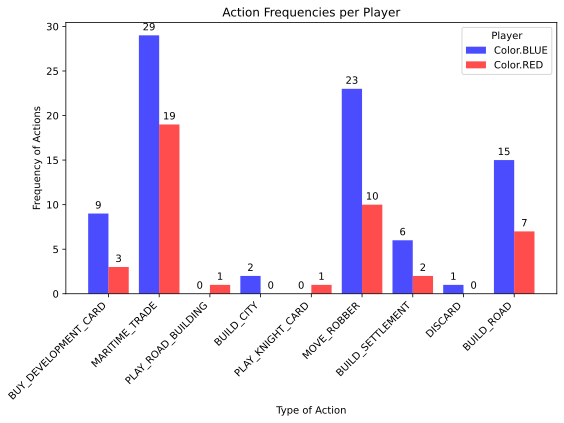

In [188]:
from catan.analysis.plot_utils import plot_action_freqs

plot_action_freqs(
    game.state.actions, exclusions=[ActionType.ROLL.name, ActionType.END_TURN.name]
)

## Catan Bot strategies

1. Balanced
2. Greedy VP hustler
3. Resource Bleeder
4. Title Chaser